3) Sentiment analysis using the public twitter API access:

For the purpose of this event, feel free to use API keys below.
To be able to do more extensive research, you need to apply for the Twitter "developer" account.
See this article for more details on how to apply:
https://www.codementor.io/@ferrorodolfo/sentiment-analysis-on-trump-s-tweets-using-python-pltbvb4xr

First, load the API credentials:

In [49]:
#This is also saved in file credentials.py
# Twitter App access keys for @user
#https://developer.twitter.com/en/apps

# Consume:
CONSUMER_KEY    = 'qg907KH5lNPeXtGHIE0RLClKt'
CONSUMER_SECRET = 'sQTi3MIOhDCuGhnlttyFG9ynVjEHhnIvnJ3Y3KC6QPuBfTAXaf'

# Access:
ACCESS_TOKEN  = '1925775572-BwFQZLGkFl1r4ViYoAi7ibnT9sCW8lUHE7wC60O'
ACCESS_SECRET = 'FOc5cFqgk3AEZtiRSfnfhVsJdLJbbuHSlrK2WJncTusjI'

Next load the code setup:

In [47]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

Unless you want a data for different user, keep the preset value in the code below:

TW_USER - this is the username of the account you want to scrape

TARGET_COUNT - this is the total number of tweets to download.

In [ ]:
TW_USER='elonmusk'
TARGET_COUNT=200

Now you can run the code below to actually download the data from the Twitter:

In [50]:
extractor = twitter_setup()

tweets = extractor.user_timeline(screen_name=TW_USER, TARGET_COUNT)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 199.

5 recent tweets:

Space Ark - 1968 by Japanese artist Shigeru Komatsuzaki (1915-2001)

Starship takes beings of Earth to Mars https://t.co/6qaIc3p4yA

@CChomp13 🤣💯

@sama What’s the average cost per chat?

@WholeMarsBlog Electric cargo ships are straightforward, as are short to medium range electric aircraft. Long-range… https://t.co/4t7raza695



Next step is to extract the text part from the tweets - starting with "dataframe" creation:

In [29]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
display(data.head(10))

,Tweets
0,Space Ark - 1968 by Japanese artist Shigeru Ko...
1,Starship takes beings of Earth to Mars https:/...
2,@CChomp13 🤣💯
3,@sama What’s the average cost per chat?
4,@WholeMarsBlog Electric cargo ships are straig...
5,@BillyM2k Team was a bit too intense with spam...
6,@RichardGarriott 1
7,@WholeMarsBlog About a week or so
8,@COLDEX_STC @SpaceX @NSF @blueicehiggins @icy_...
9,RT @COLDEX_STC: Despite 30 knot winds at the A...


Just for your reference - browse all the avalaible methods in the api. You can see you can also exctract location and other information:

In [30]:

print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


Examples of what does the other methods data looks like:

In [31]:

print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1599672158086889474
2022-12-05 07:48:57+00:00
Twitter for iPhone
46373
2583
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}


Now we load the relevant data to the table "data":

In [32]:

data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

See the first 10 elements of the dataset:

In [33]:

display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,Space Ark - 1968 by Japanese artist Shigeru Ko...,67,1599672158086889474,2022-12-05 07:48:57+00:00,Twitter for iPhone,46373,2583
1,Starship takes beings of Earth to Mars https:/...,62,1599671964582391808,2022-12-05 07:48:11+00:00,Twitter for iPhone,148985,12713
2,@CChomp13 🤣💯,12,1599669828478185472,2022-12-05 07:39:42+00:00,Twitter for iPhone,4189,191
3,@sama What’s the average cost per chat?,39,1599669552081960960,2022-12-05 07:38:36+00:00,Twitter for iPhone,22860,764
4,@WholeMarsBlog Electric cargo ships are straig...,140,1599643371428986880,2022-12-05 05:54:34+00:00,Twitter for iPhone,18147,1377
5,@BillyM2k Team was a bit too intense with spam...,85,1599640228721233921,2022-12-05 05:42:05+00:00,Twitter for iPhone,19394,1110
6,@RichardGarriott 1,18,1599638758697013248,2022-12-05 05:36:14+00:00,Twitter for iPhone,43137,1260
7,@WholeMarsBlog About a week or so,33,1599628966398025728,2022-12-05 04:57:19+00:00,Twitter for iPhone,4318,210
8,@COLDEX_STC @SpaceX @NSF @blueicehiggins @icy_...,140,1599628470744588288,2022-12-05 04:55:21+00:00,Twitter for iPhone,19229,918
9,RT @COLDEX_STC: Despite 30 knot winds at the A...,140,1599628033962307584,2022-12-05 04:53:37+00:00,Twitter for iPhone,0,3865


Get the average length of the tweets:

In [34]:
mean = np.mean(data['len'])
print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 70.5929648241206


Get the likes and retweets:

In [35]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
This is a battle for the future of civilization. If free speech is lost even in America, tyranny is all that lies ahead.
Number of likes: 921843
120 characters.

The tweet with more retweets is: 
This is a battle for the future of civilization. If free speech is lost even in America, tyranny is all that lies ahead.
Number of retweets: 146407
120 characters.



To be able to view the time series, we have to add the "Date" information to the table:

In [36]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

Length over the time:

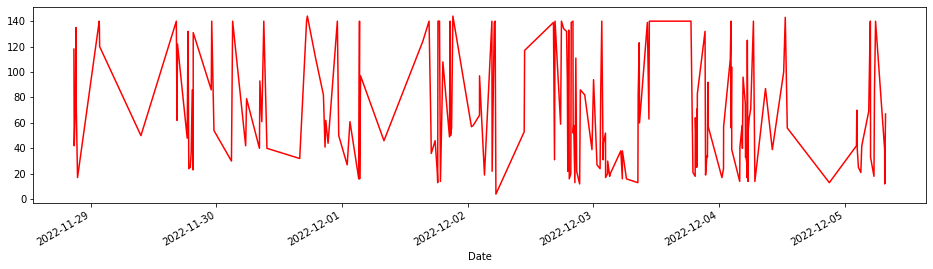

In [37]:
tlen.plot(figsize=(16,4), color='r');

Likes vs. Retweets:

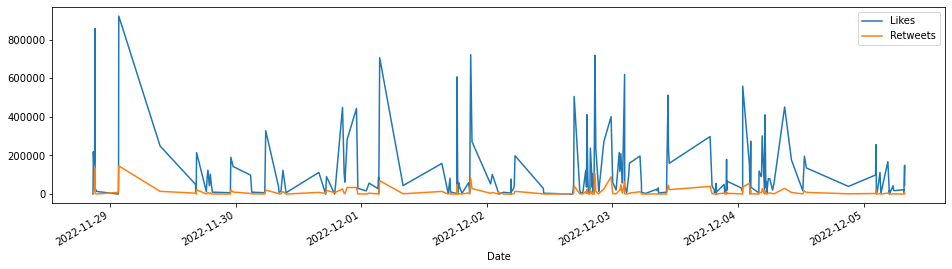

In [38]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

What is the source of the Tweet? Mobile app vs web vs application?

In [51]:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone


Cake view for the Tweet source distribution: This is handy to see if the content is geenric or created via API / App

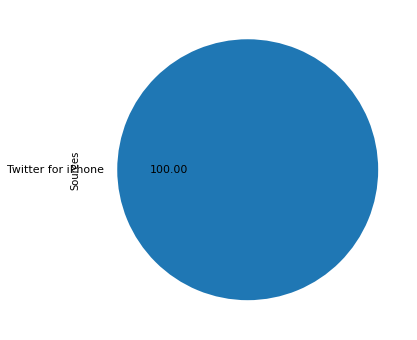

In [40]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

Sentiment analysis:

Now that we created the dataset with the texts of the tweets and date, it is possible to run the sentiment alaysis.

In [42]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1


Sample of results:
'SA' stands for sentiment analysis. Note that value for the sentiment is rounded for clearer view

In [43]:
data['SA'] = np.array([ analyze_sentiment(tweet) for tweet in data['Tweets'] ])
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Space Ark - 1968 by Japanese artist Shigeru Ko...,67,1599672158086889474,2022-12-05 07:48:57+00:00,Twitter for iPhone,46373,2583,0
1,Starship takes beings of Earth to Mars https:/...,62,1599671964582391808,2022-12-05 07:48:11+00:00,Twitter for iPhone,148985,12713,0
2,@CChomp13 🤣💯,12,1599669828478185472,2022-12-05 07:39:42+00:00,Twitter for iPhone,4189,191,0
3,@sama What’s the average cost per chat?,39,1599669552081960960,2022-12-05 07:38:36+00:00,Twitter for iPhone,22860,764,-1
4,@WholeMarsBlog Electric cargo ships are straig...,140,1599643371428986880,2022-12-05 05:54:34+00:00,Twitter for iPhone,18147,1377,1
5,@BillyM2k Team was a bit too intense with spam...,85,1599640228721233921,2022-12-05 05:42:05+00:00,Twitter for iPhone,19394,1110,1
6,@RichardGarriott 1,18,1599638758697013248,2022-12-05 05:36:14+00:00,Twitter for iPhone,43137,1260,0
7,@WholeMarsBlog About a week or so,33,1599628966398025728,2022-12-05 04:57:19+00:00,Twitter for iPhone,4318,210,0
8,@COLDEX_STC @SpaceX @NSF @blueicehiggins @icy_...,140,1599628470744588288,2022-12-05 04:55:21+00:00,Twitter for iPhone,19229,918,0
9,RT @COLDEX_STC: Despite 30 knot winds at the A...,140,1599628033962307584,2022-12-05 04:53:37+00:00,Twitter for iPhone,0,3865,1


Calcualtion of the percentage of Positive, Neutral or Negative tweets: 

This can show you if the account is the real user or just a spam bot.

In [52]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 44.72361809045226%
Percentage of neutral tweets: 44.72361809045226%
Percentage de negative tweets: 10.552763819095478%
